In [1]:
import numpy as np
import pandas as pd
np.set_printoptions(linewidth=102)
import matplotlib.pyplot as plt
import decimal
from math import ceil
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.font_manager import FontProperties

# load data & plot in notebook

In [2]:
%matplotlib inline
#%matplotlib qt
file = '/vol01/active_projects/anthony/fhd_p4_eeg_pheno_v4_beta.csv'
arr = np.loadtxt(open(file, 'rb'),delimiter=",")

# variables

In [3]:
freqs = ['Low theta', 'High theta', 'Low alpha', 'High alpha',
        'Low beta', 'Mid beta', 'High beta']
chans = ['FP1-F3', 'FP2-F4', 'FP1-F7', 'FP2-F8', 'F7-F3',
         'F8-F4', 'F7-T7', 'F8-T8', 'F3-C3', 'F4-C4', 'FZ-CZ',
         'CZ-PZ', 'T7-C3', 'T8-C4', 'T7-P7', 'T8-P8', 'C3-P3', 'C4-P4',
         'P7-P3', 'P8-P4', 'P7-O1', 'P8-O2', 'P3-O1', 'P4-O2', 'PZ-O1',
         'PZ-O2', 'O1-O2', 'CZ-C3', 'CZ-C4', 'PZ-P3', 'PZ-P4', 'F7-C3',
         'F8-C4', 'FP1-FP2', 'F3-FZ', 'FZ-F4']

# set up ages on x axis at intervals of .2 from 12-31 
xaxis = []
count = 11.8
for i in range(96):
    count += float(.2)
    xaxis.append(round(count,2))
    
xaxis_arr = np.array(xaxis)


na = arr.reshape(7,36,6,96)

In [4]:
dims = na.shape
print("{} values in entire array".format(dims[0] * dims[1] * dims[2] * dims[3]))

145152 values in entire array


In [5]:
freqs = np.vstack([na[0][i][2] for i in range(36)]).shape
print("{} observations in 6 x 6 gridplot below".format(freqs[0] * freqs[1] * 7))

24192 observations in 6 x 6 gridplot below


#### plotting 4 dimensional array

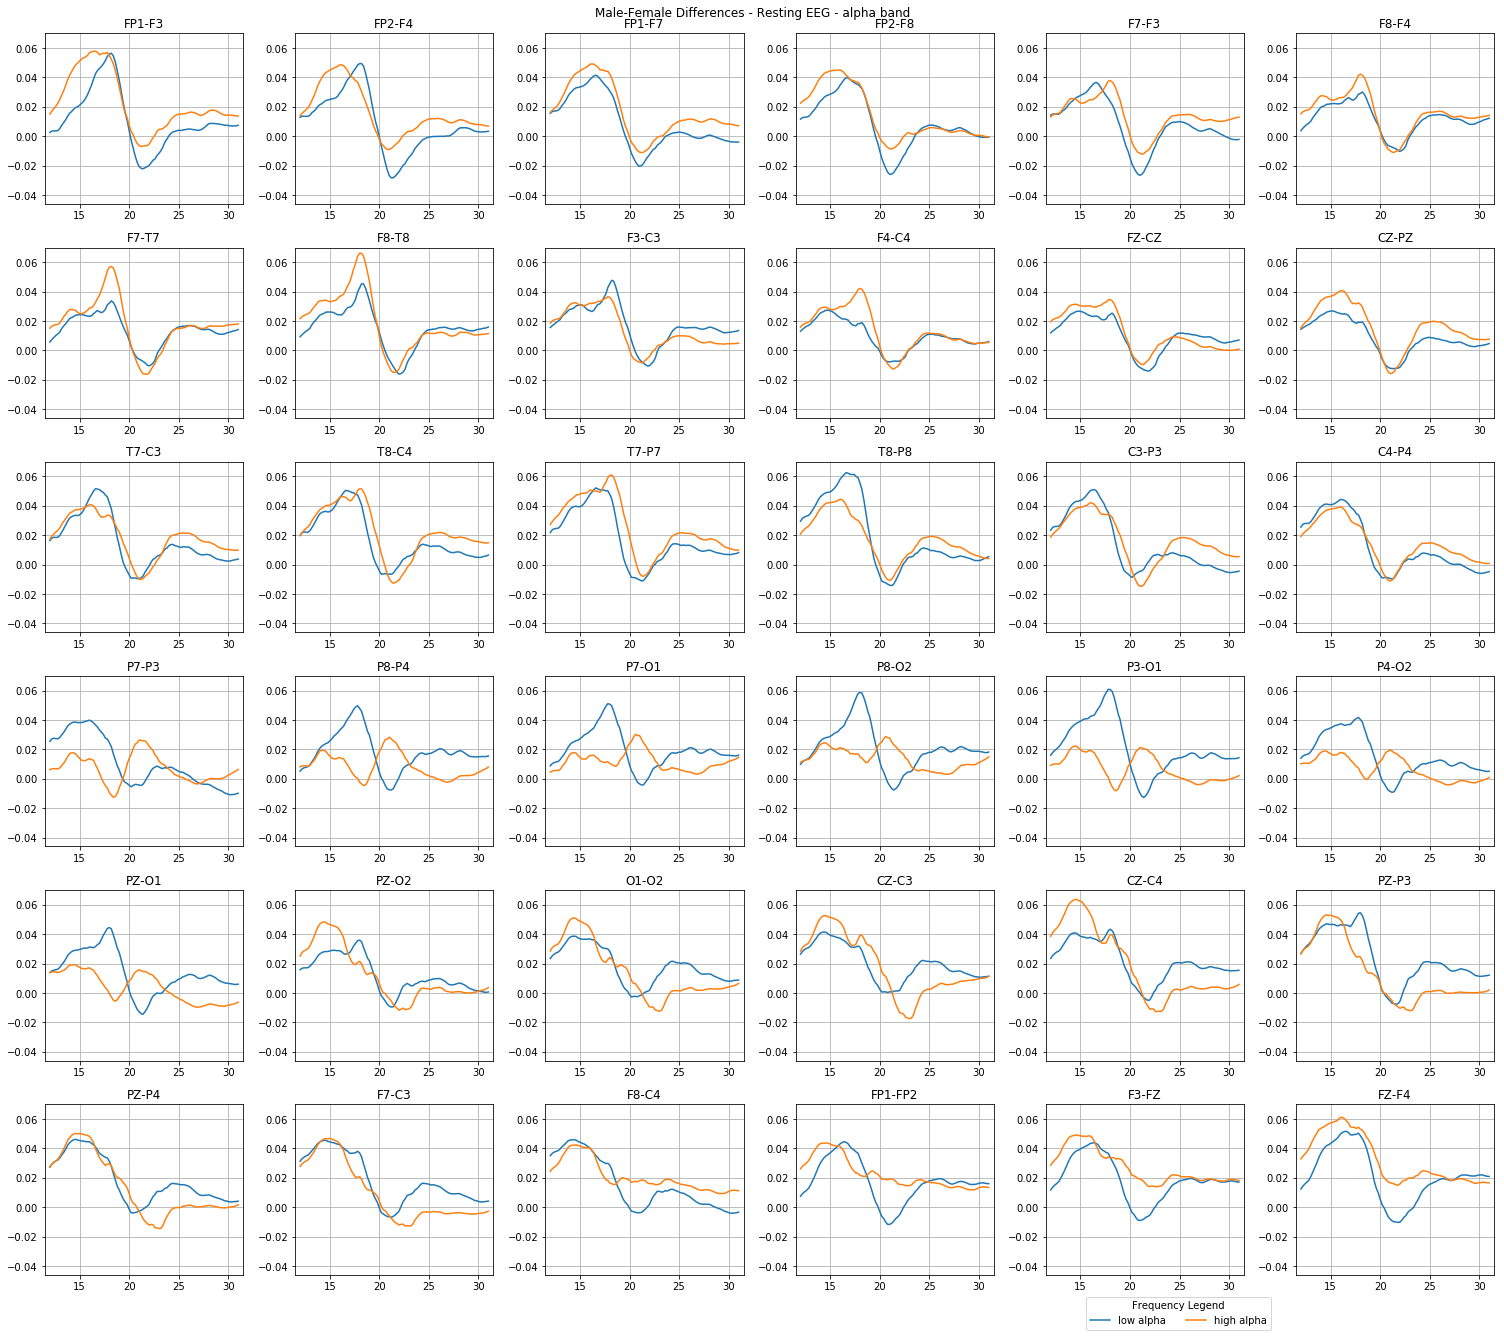

In [15]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(21,18)) #figsize=(18,15)

#with PdfPages('female_slope_adjustment.pdf') as pdf:
for idx, ax in enumerate(axes.flatten()):
    
    fig.suptitle('Male-Female Differences - Resting EEG - alpha band', y=1)
    ax.set_xlim(11.5,31.5)
    ax.set_ylim(0.07,-0.046)
    # plot data 
    #ax.plot(xaxis_arr, na[0][idx][2], label='low theta') 
    #ax.plot(xaxis_arr, na[1][idx][2], label='high theta')
    ax.plot(xaxis_arr, na[2][idx][2], label='low alpha')
    ax.plot(xaxis_arr, na[3][idx][2], label='high alpha')
    #ax.plot(xaxis_arr, na[4][idx][2], label='low beta')
    #ax.plot(xaxis_arr, na[5][idx][2], label='mid beta')
    #ax.plot(xaxis_arr, na[6][idx][2], label='high beta')
    
    # plot configs 
    ax.title.set_text(chans[idx])
    ax.invert_yaxis()  # invert works
    ax.grid('on')
    
    #ax.set_xlim(11.5,31.5)
    #ax.set_ylim(0.067, -0.034)
    fig.tight_layout() # automatically adjusts spacing b/t plots 

handles, labels = ax.get_legend_handles_labels()

lgd = ax.legend(handles, labels, loc=0, bbox_to_anchor=(-0.0999,-0.0999), ncol=7, title='Frequency Legend')

#pdf.savefig(bbox_inches='tight')

#### plot by subtracting/adding different arrays from each other
#### get maximum & minimum value in entire array to set as y axis limit

In [7]:
# subtract each channel/frequency from each other & append resulting array to list 
def subtract_arrays(na, first_arr, sec_arr):
    
    sub = []
    for i in range(36):
        sub.append(na[0][i][first_arr] - na[0][i][sec_arr])
        sub.append(na[1][i][first_arr] - na[1][i][sec_arr])
        sub.append(na[2][i][first_arr] - na[2][i][sec_arr])
        sub.append(na[3][i][first_arr] - na[3][i][sec_arr])
        sub.append(na[4][i][first_arr] - na[4][i][sec_arr])
        sub.append(na[5][i][first_arr] - na[5][i][sec_arr])
        sub.append(na[6][i][first_arr] - na[6][i][sec_arr])

    # removes the list wrapping the array
    new_arr = np.vstack(sub)
    
    # reshape again 
    return new_arr.reshape(7, 36, 96)

# use this function for arrays that are the result of addition/subtraction
def get_minmax_operations(na):
    # for each channel & each frequency, append max & min value to a list 
    maxmin_lst = []
    for i in range(36):
        
        maxmin_lst.append(np.max(na[0][i]))
        maxmin_lst.append(np.min(na[0][i]))

        maxmin_lst.append(np.max(na[1][i]))
        maxmin_lst.append(np.min(na[1][i]))
                          
        maxmin_lst.append(np.max(na[2][i]))
        maxmin_lst.append(np.min(na[2][i]))
                          
        maxmin_lst.append(np.max(na[3][i]))
        maxmin_lst.append(np.min(na[3][i]))
                          
        maxmin_lst.append(np.max(na[4][i]))
        maxmin_lst.append(np.min(na[4][i]))
                          
        maxmin_lst.append(np.max(na[5][i]))
        maxmin_lst.append(np.min(na[5][i]))
                          
        maxmin_lst.append(np.max(na[6][i]))
        maxmin_lst.append(np.min(na[6][i]))
        
    # regardless of channel-get max & min value used to set x                                           
    return '{},{}'.format(round(float(max(maxmin_lst)), 3), round(float(min(maxmin_lst)), 3))

In [7]:
newnewarr = subtract_arrays(na, 2,1) # 1/2, 3/1, 3/4
get_minmax_operations(newnewarr)

NameError: name 'subtract_arrays' is not defined

#### plotting a 3 dimensional array that's the result of subtracting 2 arrays

NameError: name 'newnewarr' is not defined

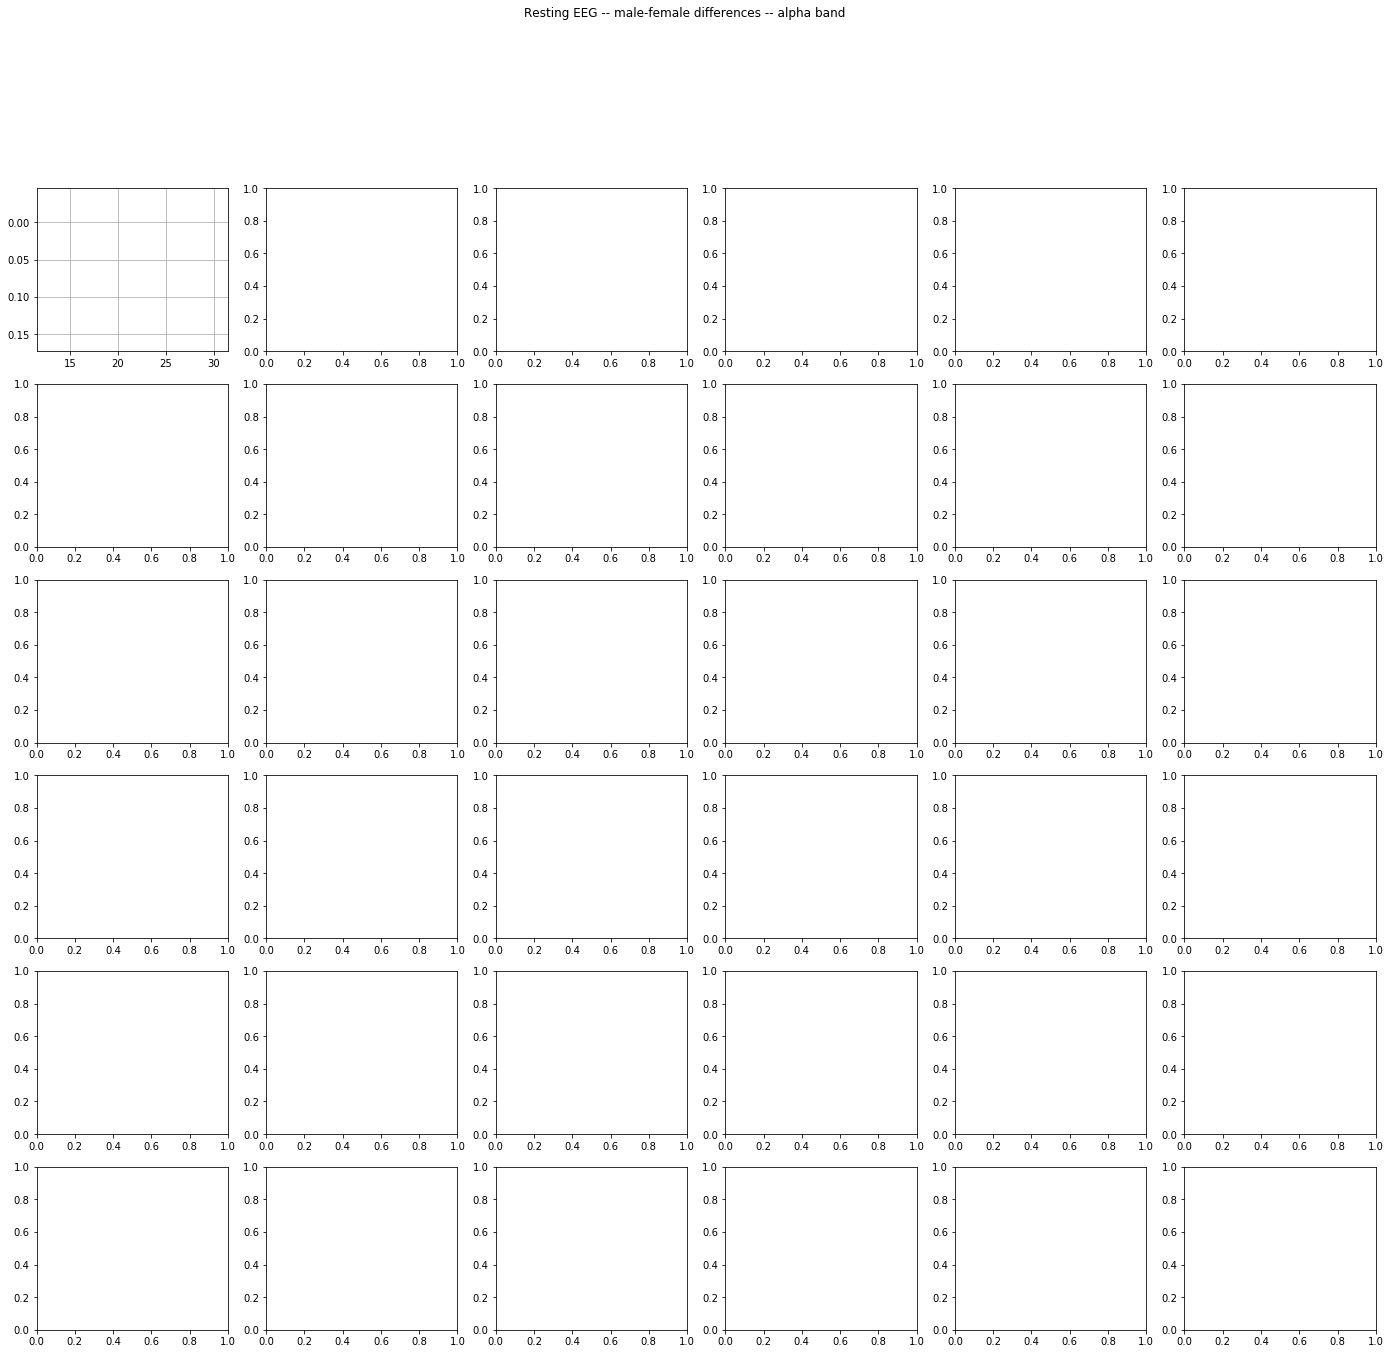

In [6]:
# plot 
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(24,21)) #24/11

with PdfPages('test.pdf') as pdf:
    for idx, ax in enumerate(axes.flatten()):

        fig.suptitle('This is a title', y=1)
        ax.grid()

        ax.set_xlim(11.5,31.5)
        ax.set_ylim(0.173,-0.046)

        ax.plot(xaxis_arr, newnewarr[0][idx], label='low theta') #ax.plot(xaxis_arr, na[0][idx][4], label='low theta')
        ax.plot(xaxis_arr, newnewarr[1][idx], label='high theta')
        ax.plot(xaxis_arr, newnewarr[2][idx], label='low alpha')
        ax.plot(xaxis_arr, newnewarr[3][idx], label='high alpha')
        ax.plot(xaxis_arr, newnewarr[4][idx], label='low beta')
        ax.plot(xaxis_arr, newnewarr[5][idx], label='mid beta')
        ax.plot(xaxis_arr, newnewarr[6][idx], label='high beta')
        ax.invert_yaxis()  # invert works

        ax.title.set_text(chans[idx])
        fig.tight_layout()

    handles, labels = ax.get_legend_handles_labels()
    lgd = ax.legend(handles, labels, loc=0, bbox_to_anchor=(-0.0999,-0.0999), ncol=7, title='Frequency Legend')
    pdf.savefig(bbox_inches='tight')